## Text Classification

In [51]:
#Required Packages
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np

In [52]:
#Version Check
print('Python: {}'. format(sys.version) )
print('NLTK: {}'. format(nltk.__version__))
print ('Scikit-learn: {}' .format(sklearn.__version__))
print('Pandas: {}'. format(pd.__version__))
print('Numpy: {}'. format(np.__version__))

Python: 3.9.6 (default, Nov 11 2024, 03:15:38) 
[Clang 16.0.0 (clang-1600.0.26.6)]
NLTK: 3.9.1
Scikit-learn: 1.6.1
Pandas: 2.2.3
Numpy: 2.0.2


In [53]:
# loading the dataset
sms = pd.read_csv("/Users/srinidhimaringanti/Desktop/NLP/SMSSpamCollection.csv") 
sms

,Unnamed: 0,Label,Message
0,0,ham,Go until jurong point crazy Available only in ...
1,1,ham,Ok lar Joking wif u oni
2,2,spam,Free entry in numbr a wkly comp to win FA Cup ...
3,3,ham,U dun say so early hor U c already then say
4,4,ham,Nah I don t think he goes to usf he lives arou...
...,...,...,...
5567,5567,spam,This is the numbrnd time we have tried numbr c...
5568,5568,ham,Will ü b going to esplanade fr home
5569,5569,ham,Pity was in mood for that So any other suggest...
5570,5570,ham,The guy did some bitching but I acted like i d...


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   Label       5572 non-null   object
 2   Message     5570 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


## Data Pre-Processing and Feature Extraction

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label = enc.fit_transform(sms['Label'])
print(label[ :10])
print(sms['Label'][ :10])

[0 0 1 0 0 1 0 0 1 1]
0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: Label, dtype: object


In [7]:
text = sms['Message']
text[:10]

0    Go until jurong point crazy Available only in ...
1                              Ok lar Joking wif u oni
2    Free entry in numbr a wkly comp to win FA Cup ...
3          U dun say so early hor U c already then say
4    Nah I don t think he goes to usf he lives arou...
5    FreeMsg Hey there darling it s been numbr week...
6    Even my brother is not like to speak with me T...
7    As per your request Melle Melle Oru Minnaminun...
8    WINNER As a valued network customer you have b...
9    Had your mobile numbr months or more U R entit...
Name: Message, dtype: object

In [55]:
processed = text.str.lower()
processed

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in numbr a wkly comp to win fa cup ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the numbrnd time we have tried numbr c...
5568                  will ü b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srinidhimaringanti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
processed = processed.astype(str)
processed = processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
ps = nltk.PorterStemmer()
processed = processed.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
processed

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri numbr wkli comp win fa cup final tk...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbrnd time tri numbr contact u u moneysymbnu...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
all_words = []
for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)

all_words = nltk.FreqDist(all_words)

print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6579
Most common words: [('numbr', 2648), ('u', 1207), ('call', 674), ('go', 456), ('get', 451), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('moneysymbnumbr', 303), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266)]


In [59]:
# use the 1500 most common words as features
word_features = [x[0] for x in all_words.most_common(1500)]
word_features

['numbr',
 'u',
 'call',
 'go',
 'get',
 'ur',
 'gt',
 'lt',
 'come',
 'moneysymbnumbr',
 'ok',
 'free',
 'day',
 'know',
 'love',
 'like',
 'got',
 'time',
 'good',
 'want',
 'text',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'take',
 'ü',
 'see',
 'stop',
 'home',
 'think',
 'repli',
 'r',
 'lor',
 'sorri',
 'still',
 'tell',
 'n',
 'numbrp',
 'back',
 'mobil',
 'da',
 'dont',
 'make',
 'k',
 'week',
 'pleas',
 'phone',
 'say',
 'hi',
 'work',
 'new',
 'pl',
 'later',
 'hope',
 'miss',
 'ask',
 'co',
 'meet',
 'msg',
 'messag',
 'night',
 'dear',
 'c',
 'wait',
 'happi',
 'well',
 'tri',
 'give',
 'great',
 'much',
 'thing',
 'claim',
 'oh',
 'min',
 'wat',
 'hey',
 'number',
 'na',
 'friend',
 'thank',
 'ye',
 'way',
 'www',
 'let',
 'e',
 'prize',
 'feel',
 'even',
 'right',
 'tomorrow',
 'wan',
 'alreadi',
 'pick',
 'cash',
 'said',
 'care',
 'b',
 'amp',
 'yeah',
 'im',
 'leav',
 'realli',
 'tone',
 'babe',
 'win',
 'life',
 'morn',
 'find',
 'last',
 'sleep',
 'servic',
 'keep

In [13]:
def find_features(message) :
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)
    return features


In [ ]:
features = find_features(processed[0]) 
for key, value in features.items ():
    if value == True:
       print (key)

go
got
n
great
wat
e
world
point
avail
crazi
bugi
la
cine


In [15]:
list(features.items())[:10]

[('numbr', False),
 ('u', False),
 ('call', False),
 ('go', True),
 ('get', False),
 ('ur', False),
 ('gt', False),
 ('lt', False),
 ('come', False),
 ('moneysymbnumbr', False)]

In [ ]:
messages = list(zip(processed, label))
np.random.seed(1)
np.random.shuffle(messages)

feature_set = [(find_features(text), label) for (text, label) in messages]

## Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
training,test = train_test_split(feature_set, test_size = 0.25, random_state = 1)

In [18]:
print(len(training))
print(len(test))

4179
1393


In [61]:
x_train = [f[0] for f in training]
y_train = [f[1] for f in training]

In [62]:
x_test = [f[0] for f in test]
y_test = [f[1] for f in test]

In [63]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [64]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [65]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_train.shape}")

x_train shape: (4179, 1500), y_train shape: (4179,)
x_test shape: (1393, 1500), y_test shape: (4179,)


In [66]:
x_train

,numbr,u,call,go,get,ur,gt,lt,come,moneysymbnumbr,...,bowl,site,salari,videophon,videochat,java,dload,nolin,rentl,yun
0,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4177,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
x_test

,numbr,u,call,go,get,ur,gt,lt,come,moneysymbnumbr,...,bowl,site,salari,videophon,videochat,java,dload,nolin,rentl,yun
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1389,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
y_train

0       1
1       0
2       0
3       0
4       1
       ..
4174    0
4175    0
4176    0
4177    0
4178    0
Length: 4179, dtype: int64

In [69]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1388    0
1389    0
1390    0
1391    0
1392    0
Length: 1393, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred = rf_model.predict(x_test)
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1199
           1       0.97      0.90      0.93       194

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



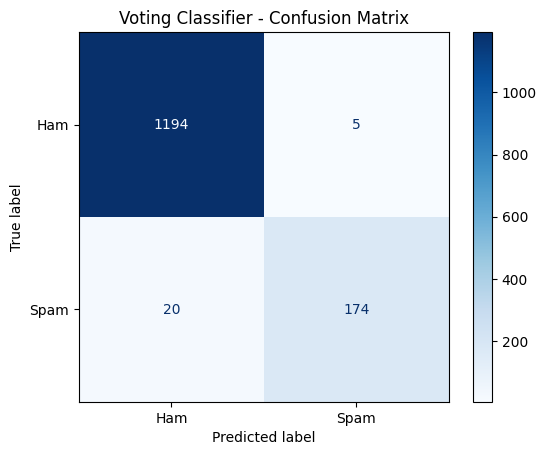

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize with Labels
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Ham', 'Spam'])
disp. plot(cmap="Blues", values_format="d")
plt.title("Voting Classifier - Confusion Matrix")
plt.show()

In [ ]:
feature_names = x_train.columns

In [ ]:
# Extract feature importance
feature_importance = rf_model. feature_importances_

In [79]:
# Create DataFrame for visualization
importance_df = pd. DataFrame({ 'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

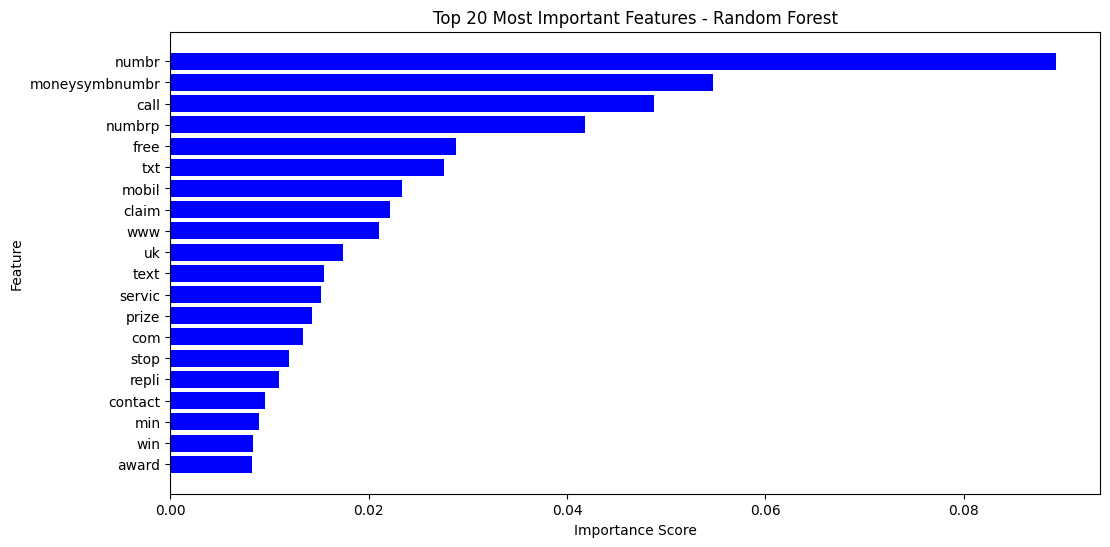

In [80]:
# Plot Top 20 Important Features
plt. figure(figsize=(12, 6))
plt. barh(importance_df["Feature"][:20], importance_df ["Importance"][:20], color='blue')
plt. xlabel("Importance Score")
plt.ylabel ("Feature")
plt.title("Top 20 Most Important Features - Random Forest") 
plt.gca().invert_yaxis() # Show highest importance at top 
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 
import numpy as np

In [81]:
# Ensure X_train is in numerical format
x_train_numeric = x_train.astype(int)

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_numeric, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get predicted probabilities for the positive class (spam)
y_probs = rf_model. predict_proba(x_train_numeric)[:, 1] # Probability of "Spam"

In [82]:
# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_probs) # False Positive Rate, True Positive Rate
roc_auc = roc_auc_score(y_train, y_probs) # Compute AUC Score

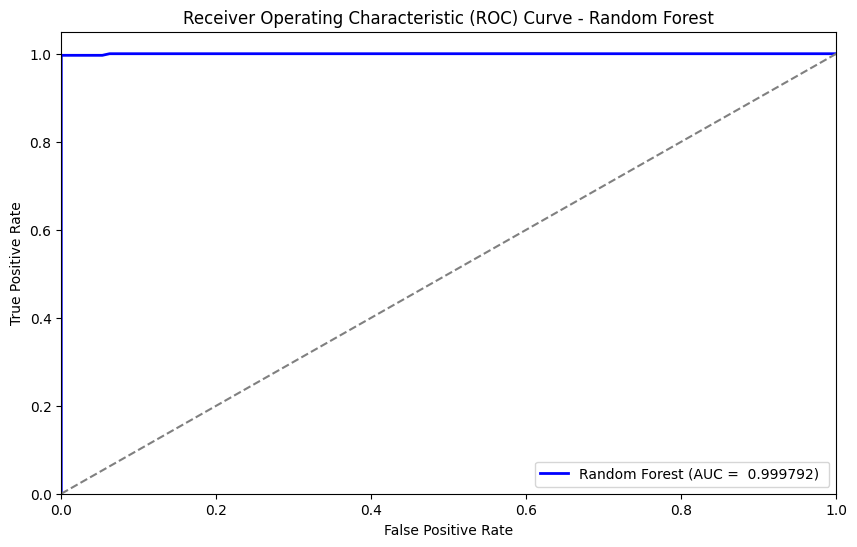

In [83]:
# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc: 2f}) ')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim ([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [84]:
from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
names = ['K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SGD Classifier'
'Naive Bayes', 'Support Vector Classifier']
classifiers = [
KNeighborsClassifier(),
DecisionTreeClassifier(), RandomForestClassifier(),
LogisticRegression(),
SGDClassifier (max_iter=100),
MultinomialNB(),
SVC(kernel='linear')
]

In [85]:
models = zip(names, classifiers)
for name, model in models:
    nltk_model = SklearnClassifier (model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, test)
    print("{} model Accuracy: {}". format (name,accuracy))


K Nearest Neighbors model Accuracy: 0.9454414931801867
Decision Tree model Accuracy: 0.9641062455132807
Random Forest model Accuracy: 0.9798994974874372
Logistic Regression model Accuracy: 0.9834888729361091
SGD ClassifierNaive Bayes model Accuracy: 0.9806173725771715
Support Vector Classifier model Accuracy: 0.9856424982053122


In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
# Since VotingClassifier can accept List type of models
models = list(zip(names, classifiers))

In [50]:
nltk_ensemble = SklearnClassifier(VotingClassifier(estimators=models, voting='hard', n_jobs=-1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensemble,test)
print("Voting Classifier model Accuracy: {}".format(accuracy))

Voting Classifier model Accuracy: 0.9842067480258435
